In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from Libreria import CDIN as cd
import warnings
import gower
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Code,Municipality,State Code,State,Total Male Population: 2010,Total Female Population: 2010,Percentage of Males of 15 to 29: 2010,Percentage of Males of 15 to 29: 2015,Percentage of Females of 15 to 29: 2010,Percentage of Females of 15 to 29: 2015,...,Female Births: 2009,Female Births: 2010,Female Births: 2011,Female Births: 2012,Female Births: 2013,Female Births: 2014,Female Births: 2015,Female Births: 2016,Female Births: 2017,Female Births: 2018
0,9012,Tlalpan,9,Ciudad de México,312139,338428,26.9,11.716664,25.5,12.175235,...,5258,5275,5468,5286,5092,5243,4918,4480,4133,3932
1,9013,Xochimilco,9,Ciudad de México,205305,209702,27.9,12.364011,26.1,12.453208,...,3673,3779,3939,3865,3466,3712,3390,3314,2978,2828
2,9008,La Magdalena Contreras,9,Ciudad de México,114492,124594,26.1,11.946155,24.8,12.070394,...,2115,2147,2084,1966,2001,1944,1857,1715,1633,1547
3,9002,Azcapotzalco,9,Ciudad de México,196053,218658,25.5,10.831140,23.3,11.274462,...,3646,3693,3536,3572,3133,3246,2956,2790,2757,2426
4,9014,Benito Juárez,9,Ciudad de México,176410,209029,23.0,9.792389,20.9,10.331180,...,2394,2497,2443,2436,2378,2532,2402,2176,2079,1871


In [3]:
df.describe()

,Code,State Code,Total Male Population: 2010,Total Female Population: 2010,Percentage of Males of 15 to 29: 2010,Percentage of Males of 15 to 29: 2015,Percentage of Females of 15 to 29: 2010,Percentage of Females of 15 to 29: 2015,Percentage of Males of 60 or more: 2010,Percentage of Males of 60 or more: 2015,...,Female Births: 2009,Female Births: 2010,Female Births: 2011,Female Births: 2012,Female Births: 2013,Female Births: 2014,Female Births: 2015,Female Births: 2016,Female Births: 2017,Female Births: 2018
count,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,...,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000,2436.000000
mean,19358.127668,19.249589,22497.768883,23573.724548,25.314860,11.864195,25.827627,12.539716,11.705624,6.170886,...,519.536125,535.270936,522.783251,502.855501,493.685961,495.187603,471.927340,457.894910,444.269704,429.427750
std,7384.610873,7.369014,64999.834080,68275.318964,2.618953,1.448945,2.722393,1.535702,4.724324,2.302327,...,1390.835319,1378.471951,1356.235296,1326.946569,1305.849549,1313.178555,1269.645972,1222.272739,1184.343765,1132.938406
min,1001.000000,1.000000,40.000000,53.000000,5.000000,4.693878,10.100000,3.508772,2.200000,1.198205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14078.750000,14.000000,2132.000000,2223.750000,23.900000,11.080011,24.400000,11.790046,8.400000,4.555044,...,51.000000,53.000000,48.000000,48.000000,37.750000,43.000000,36.750000,34.750000,34.000000,35.000000
50%,20230.500000,20.000000,6315.500000,6529.500000,25.700000,12.059610,26.200000,12.769226,10.700000,5.689082,...,159.500000,167.500000,166.000000,153.500000,146.000000,147.000000,134.500000,133.000000,128.000000,126.000000
75%,24033.250000,24.000000,16076.000000,16723.500000,27.100000,12.867398,27.600000,13.548574,14.000000,7.345406,...,428.250000,455.250000,434.250000,406.250000,400.000000,399.250000,367.000000,367.250000,348.250000,345.000000
max,32058.000000,32.000000,880998.000000,934788.000000,36.200000,17.696080,36.400000,17.173112,36.600000,17.181855,...,21065.000000,17536.000000,17052.000000,16619.000000,16095.000000,16870.000000,16774.000000,16036.000000,15618.000000,15265.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 66 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Code                                       2436 non-null   int64  
 1   Municipality                               2436 non-null   object 
 2   State Code                                 2436 non-null   int64  
 3   State                                      2436 non-null   object 
 4   Total Male Population: 2010                2436 non-null   int64  
 5   Total Female Population: 2010              2436 non-null   int64  
 6   Percentage of Males of 15 to 29: 2010      2436 non-null   float64
 7   Percentage of Males of 15 to 29: 2015      2436 non-null   float64
 8   Percentage of Females of 15 to 29: 2010    2436 non-null   float64
 9   Percentage of Females of 15 to 29: 2015    2436 non-null   float64
 10  Percentage of Males of 6

In [5]:
cd.dqr(df)

,Name,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,% Data Missing,% Data Present
Code,Code,int64,0,2436,2436,1001,32058,19358.127668,7384.610873,5.453248e+07,20230.5,0.0,100.0
Municipality,Municipality,object,0,2436,2296,Abalá,Álvaro Obregón,NaN,NaN,NaN,NaN,0.0,100.0
State Code,State Code,int64,0,2436,32,1,32,19.249589,7.369014,5.430236e+01,20.0,0.0,100.0
State,State,object,0,2436,32,Aguascalientes,Zacatecas,NaN,NaN,NaN,NaN,0.0,100.0
Total Male Population: 2010,Total Male Population: 2010,int64,0,2436,2291,40,880998,22497.768883,64999.834080,4.224978e+09,6315.5,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Female Births: 2014,Female Births: 2014,int64,0,2436,875,0,16870,495.187603,1313.178555,1.724438e+06,147.0,0.0,100.0
Female Births: 2015,Female Births: 2015,int64,0,2436,830,0,16774,471.927340,1269.645972,1.612001e+06,134.5,0.0,100.0
Female Births: 2016,Female Births: 2016,int64,0,2436,824,0,16036,457.894910,1222.272739,1.493951e+06,133.0,0.0,100.0
Female Births: 2017,Female Births: 2017,int64,0,2436,818,0,15618,444.269704,1184.343765,1.402670e+06,128.0,0.0,100.0


# EDA

In [6]:
df.columns

Index(['Code', 'Municipality', 'State Code', 'State',
       'Total Male Population: 2010', 'Total Female Population: 2010',
       'Percentage of Males of 15 to 29: 2010',
       'Percentage of Males of 15 to 29: 2015',
       'Percentage of Females of 15 to 29: 2010',
       'Percentage of Females of 15 to 29: 2015',
       'Percentage of Males of 60 or more: 2010',
       'Percentage of Males of 60 or more: 2015',
       'Percentage of Females of 60 or more: 2010',
       'Percentage of Females of 60 or more: 2015', 'Median Male Age: 2010',
       'Median Female Age: 2010', 'Male Births: 1994', 'Male Births: 1995',
       'Male Births: 1996', 'Male Births: 1997', 'Male Births: 1998',
       'Male Births: 1999', 'Male Births: 2000', 'Male Births: 2001',
       'Male Births: 2002', 'Male Births: 2003', 'Male Births: 2004',
       'Male Births: 2005', 'Male Births: 2006', 'Male Births: 2007',
       'Male Births: 2008', 'Male Births: 2009', 'Male Births: 2010',
       'Male Births: 201

In [7]:

df['State'].unique()

array(['Ciudad de México', 'Guerrero', 'Estado de México', 'Morelos',
       'Sinaloa', 'Sonora', 'Baja California', 'Baja California Sur',
       'Chihuahua', 'Nayarit', 'Jalisco', 'Michoacán de Ocampo',
       'Durango', 'Colima', 'Zacatecas', 'Coahuila de Zaragoza',
       'Tabasco', 'Oaxaca', 'Querétaro', 'San Luis Potosí', 'Guanajuato',
       'Aguascalientes', 'Veracruz de Ignacio de la Llave', 'Tlaxcala',
       'Puebla', 'Hidalgo', 'Nuevo León', 'Chiapas', 'Tamaulipas',
       'Yucatán', 'Campeche', 'Quintana Roo'], dtype=object)

#  INSIGHTS

# 1

In [8]:
Date_Male_Births = [df.iloc[:,16:41].columns]
Date_Female_Births = [df.iloc[:,41:].columns]

Años = [Date_Male_Births[0][i].split()[2] for i in range(len(Date_Male_Births[0]))] # Compresión de lista para separar el
# titulo de la columna y unicamente alamacenar los años

Males_Jalisco = np.array([df[Date_Male_Births[i]][df['State'] == 'Jalisco'].mean() for i in range(len(Date_Male_Births))])[0]

Females_Jalisco = np.array([df[Date_Female_Births[i]][df['State'] == 'Jalisco'].mean() for i in range(len(Date_Male_Births))])[0]


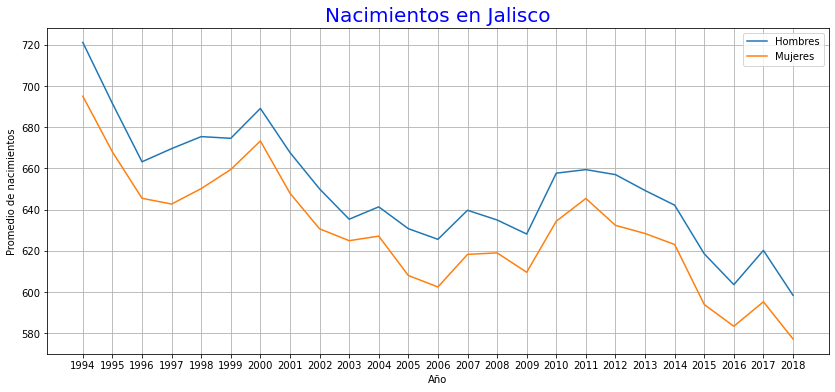

In [9]:
plt.figure(figsize = (14,6))
plt.plot(Años, Males_Jalisco, label = 'Hombres')
plt.plot(Años, Females_Jalisco, Label = 'Mujeres')
plt.title('Nacimientos en Jalisco', color = 'b', fontsize = 20)
plt.xlabel('Año')
plt.ylabel('Promedio de nacimientos')
plt.legend(loc = 'best')
plt.grid()

Podemos observar de manera clara que a lo largo del tiempo en promedio cada año nacen más hombres que mujeres, y que ambas series de tiempo tienen una tendencia a la baja

# 2 

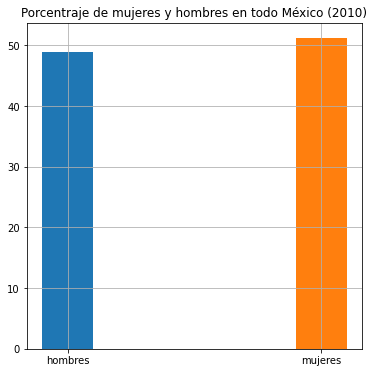

In [10]:
Total_male = df['Total Male Population: 2010'].sum()
Total_female = df['Total Female Population: 2010'].sum()

ph2010 = Total_male / (Total_female + Total_male) * 100
pm2010 = Total_female / (Total_male + Total_female) * 100


plt.figure(figsize = (6,6))
plt.title('Porcentraje de mujeres y hombres en todo México (2010)')
plt.bar('hombres',ph2010, width = .2)
plt.bar('mujeres',pm2010, width = .2)
plt.grid()

# 3

In [11]:
A = [(Años[i],(df['State'][df[Date_Male_Births[0][i]] == df[Date_Male_Births[0][i]].max()]).values[0],df[Date_Male_Births[0][i]].max() ) for i in range(len(Años))]
Año_estado_tup = [(A[i][0],A[i][1]) for i in range(len(A))]
Año_estado_str = ['-'.join(Año_estado_tup[i]) for i in range(len(Año_estado_tup))]

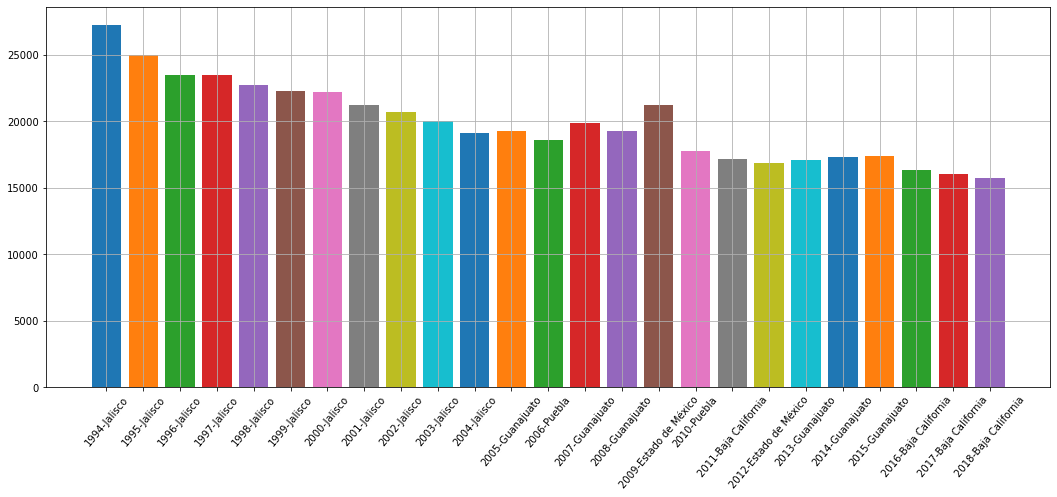

In [12]:

plt.figure(figsize = (18,7))
plt.grid()
[plt.bar(Año_estado_str[i],A[i][2]) for i in range(len(Año_estado_str))]
plt.xticks(rotation=50 );

In [13]:
# CONCLUSION

# Análisis de similitud

In [14]:
df['Municipality'][2000]#.nunique()

'San Juan Atenco'

In [15]:
df.columns

Index(['Code', 'Municipality', 'State Code', 'State',
       'Total Male Population: 2010', 'Total Female Population: 2010',
       'Percentage of Males of 15 to 29: 2010',
       'Percentage of Males of 15 to 29: 2015',
       'Percentage of Females of 15 to 29: 2010',
       'Percentage of Females of 15 to 29: 2015',
       'Percentage of Males of 60 or more: 2010',
       'Percentage of Males of 60 or more: 2015',
       'Percentage of Females of 60 or more: 2010',
       'Percentage of Females of 60 or more: 2015', 'Median Male Age: 2010',
       'Median Female Age: 2010', 'Male Births: 1994', 'Male Births: 1995',
       'Male Births: 1996', 'Male Births: 1997', 'Male Births: 1998',
       'Male Births: 1999', 'Male Births: 2000', 'Male Births: 2001',
       'Male Births: 2002', 'Male Births: 2003', 'Male Births: 2004',
       'Male Births: 2005', 'Male Births: 2006', 'Male Births: 2007',
       'Male Births: 2008', 'Male Births: 2009', 'Male Births: 2010',
       'Male Births: 201

In [16]:
a = df.iloc[0:2000,2:16].columns
df.drop(columns = a,inplace = True)
df.drop(columns = 'Code', inplace = True)
df = df.iloc[:2000,:]

In [17]:
df


,Municipality,Male Births: 1994,Male Births: 1995,Male Births: 1996,Male Births: 1997,Male Births: 1998,Male Births: 1999,Male Births: 2000,Male Births: 2001,Male Births: 2002,...,Female Births: 2009,Female Births: 2010,Female Births: 2011,Female Births: 2012,Female Births: 2013,Female Births: 2014,Female Births: 2015,Female Births: 2016,Female Births: 2017,Female Births: 2018
0,Tlalpan,5947,5537,5563,5454,5476,5662,5673,5471,5431,...,5258,5275,5468,5286,5092,5243,4918,4480,4133,3932
1,Xochimilco,4036,3884,3764,3942,3900,3926,3914,3720,3679,...,3673,3779,3939,3865,3466,3712,3390,3314,2978,2828
2,La Magdalena Contreras,2562,2429,2487,2495,2576,2591,2405,2582,2464,...,2115,2147,2084,1966,2001,1944,1857,1715,1633,1547
3,Azcapotzalco,6660,5964,5532,5538,5443,4941,5094,4772,4761,...,3646,3693,3536,3572,3133,3246,2956,2790,2757,2426
4,Benito Juárez,4342,4230,3871,3474,3349,3143,3117,3074,2697,...,2394,2497,2443,2436,2378,2532,2402,2176,2079,1871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,San Gregorio Atzompa,75,98,106,90,106,126,93,109,100,...,84,95,107,114,92,97,101,99,105,80
1996,San Jerónimo Tecuanipan,98,83,90,93,91,92,82,87,92,...,69,89,68,79,55,95,91,95,67,75
1997,San Jerónimo Xayacatlán,71,78,63,67,58,55,64,72,52,...,45,26,41,38,35,28,26,24,30,28
1998,San José Chiapa,119,103,83,119,108,117,123,111,97,...,99,116,136,153,106,110,124,100,118,85


In [21]:
distancia_gower = gower.gower_matrix(df)
distancia_gower_df = pd.DataFrame(distancia_gower, columns = df['Municipality'], index = df['Municipality'])

In [28]:
distancia_gower_df

Municipality,Tlalpan,Xochimilco,La Magdalena Contreras,Azcapotzalco,Benito Juárez,Cuauhtémoc,Álvaro Obregón,Gustavo A. Madero,Cuajimalpa de Morelos,Miguel Hidalgo,...,San Antonio Cañada,San Diego la Mesa Tochimiltzingo,San Felipe Teotlalcingo,San Felipe Tepatlán,San Gabriel Chilac,San Gregorio Atzompa,San Jerónimo Tecuanipan,San Jerónimo Xayacatlán,San José Chiapa,San José Miahuatlán
Municipality,,,,,,,,,,,,,,,,,,,,,
Tlalpan,0.000000,0.096415,0.172950,0.080546,0.145816,0.059444,0.064850,0.325482,0.188993,0.114194,...,0.279545,0.282507,0.276333,0.280298,0.273577,0.278341,0.279348,0.281235,0.277596,0.274433
Xochimilco,0.096415,0.000000,0.096142,0.054194,0.071127,0.105505,0.141657,0.402289,0.112186,0.056471,...,0.202738,0.205700,0.199525,0.203491,0.196770,0.201534,0.202541,0.204428,0.200789,0.197626
La Magdalena Contreras,0.172950,0.096142,0.000000,0.115760,0.047427,0.182040,0.218192,0.478824,0.036854,0.079678,...,0.126203,0.129166,0.122991,0.126957,0.120235,0.124999,0.126006,0.127893,0.124254,0.121091
Azcapotzalco,0.080546,0.054194,0.115760,0.000000,0.088626,0.085888,0.122193,0.382672,0.131804,0.055690,...,0.222355,0.225318,0.219143,0.223109,0.216388,0.221151,0.222158,0.224045,0.220407,0.217243
Benito Juárez,0.145816,0.071127,0.047427,0.088626,0.000000,0.154906,0.191058,0.451690,0.062785,0.052544,...,0.153337,0.156299,0.150124,0.154090,0.147369,0.152133,0.153140,0.155027,0.151388,0.148225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Gregorio Atzompa,0.278341,0.201534,0.124999,0.221151,0.152133,0.287431,0.323583,0.584215,0.108955,0.185069,...,0.020930,0.023774,0.021705,0.021671,0.024371,0.000000,0.020710,0.022513,0.020634,0.023516
San Jerónimo Tecuanipan,0.279348,0.202541,0.126006,0.222158,0.153140,0.288438,0.324590,0.585222,0.109962,0.186076,...,0.020356,0.022767,0.022633,0.020776,0.025378,0.020710,0.000000,0.021495,0.021492,0.024523
San Jerónimo Xayacatlán,0.281235,0.204428,0.127893,0.224045,0.155027,0.290325,0.326477,0.587109,0.111849,0.187963,...,0.021346,0.020880,0.024510,0.020613,0.027266,0.022513,0.021495,0.000000,0.023247,0.026410
